# Лекция 6: Собственные значения и собственные векторы

## Краткий обзор предыдущей лекции
- Линейные системы
- Метод Гаусса
- LU-разложение
- Число обусловленности как мера прямой устойчивости задачи

## Сегодняшняя лекция
Сегодня мы поговорим о:
- Собственных векторах и их приложениях (PageRank)
- Вычислении собственных векторов методом степенной итерации
- Теореме Шура
- Нормальных матрицах

## Что такое собственный вектор?

- **Определение.** Вектор $x \ne 0$ называется **собственным вектором** квадратной матрицы $A$, если существует число $\lambda$ такое, что  

$$ Ax = \lambda x. $$

- Число $\lambda$ называется **собственным значением**. Также используется термин **собственная пара**.

- Поскольку $A - \lambda I$ должна иметь нетривиальное ядро, собственные значения являются корнями характеристического многочлена

$$ \det (A - \lambda I) = 0.$$

## Разложение по собственным значениям
Если матрица $A$ размера $n\times n$ имеет $n$ собственных векторов $s_i$, $i=1,\dots,n$:

$$ As_i = \lambda_i s_i, $$

то это можно записать как

$$ A S = S \Lambda, \quad\text{где}\quad S=(s_1,\dots,s_n), \quad \Lambda = \text{diag}(\lambda_1, \dots, \lambda_n), $$

или эквивалентно

$$ A = S\Lambda S^{-1}. $$

- Это называется **разложением по собственным значениям** матрицы. Матрицы, которые могут быть представлены через разложение по собственным значениям, называются **диагонализируемыми**.

### Существование

- Какие классы матриц диагонализируемы?

- Простой пример - это матрицы с различными собственными значениями.
- В более общем случае, матрица диагонализируема тогда и только тогда, когда **алгебраическая кратность** каждого собственного значения (кратность собственного значения в характеристическом многочлене) равна его **геометрической кратности** (размерности собственного подпространства).

- Для наших целей наиболее важным классом диагонализируемых матриц является класс **нормальных матриц**:

$$AA^* = A^* A.$$

- Вы узнаете, как доказать, что нормальные матрицы диагонализируемы, через несколько слайдов (тема разложения Шура).

#### Пример

* Вы можете просто проверить, что, например, матрица 

$$A = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}$$ 

имеет одно собственное значение $1$ кратности $2$ (так как её характеристический многочлен равен $p(\lambda)=(1-\lambda)^2$), но только один собственный вектор $\begin{pmatrix} c \\ 0  \end{pmatrix}$, и, следовательно, матрица не диагонализируема.

## Почему собственные векторы и собственные значения важны?

- Собственные векторы являются как важными вспомогательными инструментами, так и играют важную роль в приложениях.

Можете привести несколько примеров?


## Применения собственных значений/собственных векторов

- **Теория коммуникаций:** теоретический предел количества передаваемой информации
- **Проектирование мостов** (машиностроение)
- **Проектирование** hi-fi аудиосистем
- **Квантовая химия:** весь наш микромир управляется **уравнением Шрёдингера**, которое является задачей на собственные значения:

$$ H \psi = E \psi, $$

- Редукция порядка моделей сложных систем
- Анализ графов (PageRank, кластеризация графов)


## Eigenvalues are vibrational frequencies

A typical computation of eigenvectors / eigenvectors is for studying 

- Vibrational computations of mechanical structures
- Model order reduction of complex systems

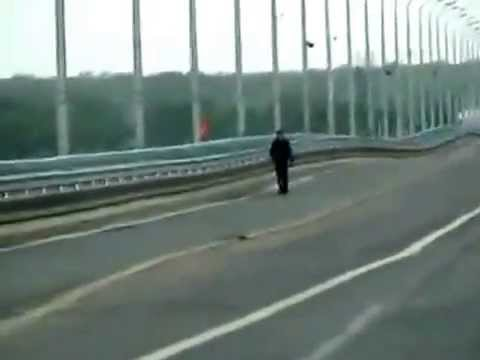

In [1]:
from IPython.display import YouTubeVideo 
YouTubeVideo("VcCcMZo6J6w")

## Google PageRank
- Одним из самых известных вычислений собственных векторов является **Google PageRank**.
- В настоящее время он активно не используется Google, но был одной из основных особенностей на ранних этапах. Вопрос в том, как мы ранжируем веб-страницы, какая из них важна, а какая нет.
- Всё, что мы знаем о сети, это какая страница ссылается на какую. PageRank определяется рекурсивным определением.
- Обозначим через $p_i$ **важность** $i$-й страницы.
- Затем мы определяем эту важность как среднее значение всех важностей всех страниц, которые ссылаются на текущую страницу. Это даёт нам линейную систему

$$ p_i = \sum_{j \in N(i)} \frac{p_j}{L(j)}, $$

где $L(j)$ - количество исходящих ссылок на $j$-й странице, $N(i)$ - все соседи $i$-й страницы. Это можно переписать как

$$ p = G p, \quad G_{ij} = \frac{1}{L(j)} $$

или как задачу на собственные значения

$$
   Gp = 1 p,
$$

т.е. собственное значение $1$ уже известно. Заметим, что $G$ является **левой стохастической** матрицей, т.е. сумма элементов в каждом её столбце равна $1$.
Проверьте, что любая левая стохастическая матрица имеет максимальное собственное значение, равное $1$.

## Демонстрация
- Мы можем вычислить PageRank, используя некоторые пакеты Python.
- Мы будем использовать пакет ```networkx``` для работы с графами, который можно установить с помощью

- Мы будем использовать простой пример [сети карате-клуба Захари](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).
- Эти данные были собраны вручную в 1977 году и представляют собой классический набор данных социальной сети.

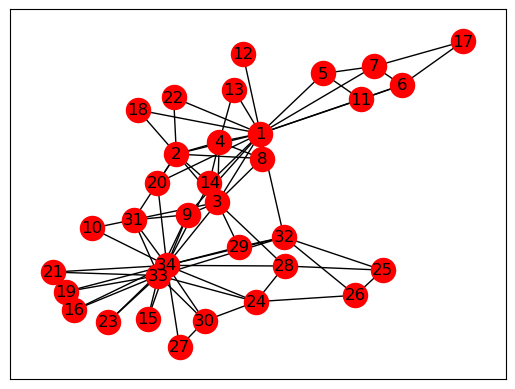

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('karate.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn, node_color="red") #Draw the graph

- Теперь мы можем вычислить PageRank, используя встроенную функцию NetworkX.
- Мы также отображаем размер узлов больше, если их PageRank больше.

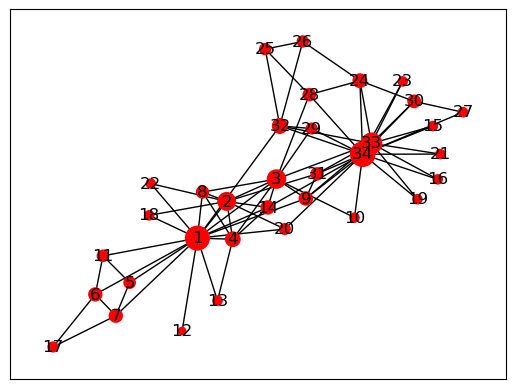

In [5]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, node_color="red", labels=None)

## Вычисление собственных значений

- Как вычислить собственные значения и собственные векторы?

Существует два типа задач на собственные значения:

- полная задача на собственные значения (требуются все собственные значения и собственные векторы)
- частичные собственные значения (требуются минимальные/максимальные собственные значения, собственные значения в заданной области)

## Вычисление собственных значений через характеристические уравнения
Задача на собственные значения имеет вид  

$$ Ax = \lambda x, $$

или

$$ (A - \lambda I) x = 0, $$

следовательно, матрица $A - \lambda I$ имеет нетривиальное ядро и должна быть сингулярной. 

Это означает, что **определитель**  

$$ p(\lambda) = \det(A - \lambda I) = 0. $$

- Это уравнение называется **характеристическим уравнением** и является многочленом порядка $n$. 
- Многочлен степени $n$ имеет $n$ комплексных корней!

## Вспомним определение определителя
Определитель квадратной матрицы $A$ определяется как 

$$\det A = \sum_{\sigma \in S_n} \mathrm{sgn}({\sigma})\prod^n_{i=1} a_{i, \sigma_i},$$

где 
- $S_n$ - множество всех **перестановок** чисел $1, \ldots, n$
- $\mathrm{sgn}$ - **знак** перестановки ( $(-1)^p$, где $p$ - число транспозиций, которые нужно сделать).

## Свойства определителя
Определитель имеет много полезных свойств:

_1._ $\det(AB) = \det(A) \det(B)$

_2._ Если одна строка представлена в виде суммы двух векторов, определитель является суммой двух определителей

_3._ "Разложение по минорам": мы можем разложить определитель по выбранной строке или столбцу.

- Если делать это через **разложение по минорам**, получаем **экспоненциальную** сложность по $n$.

- Можем ли мы достичь сложности $\mathcal{O}(n^3)$?

## Собственные значения и характеристическое уравнение

- Теперь вернемся к собственным значениям.

- Характеристическое уравнение может быть использовано для вычисления собственных значений, что приводит к **наивному** алгоритму:

$$p(\lambda) = \det(A - \lambda I)$$

1. Вычислить коэффициенты многочлена
2. Вычислить корни

**Это хорошая идея**?   

**Поделитесь своим мнением**

Мы можем сделать короткую демонстрацию этого

Text(0, 0.5, 'Imaginary part')

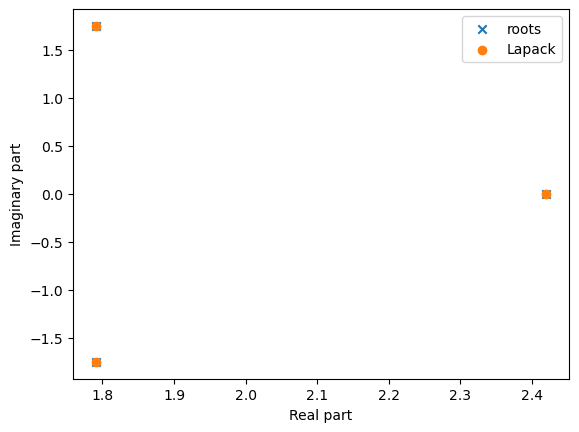

In [7]:
import matplotlib.pyplot as plt
import numpy as np

n = 3
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
# There is a special numpy function for characteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
# print('Coefficients of the polynomial:', cf)
# print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='roots')
b = a + 1e-3 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Lapack')
# plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

### Мораль

- Не делайте этого, если у вас нет веской причины.
- Поиск корней многочлена очень **плохо обусловлен** (может быть намного лучше, но не с мономами $\{1,x,x^2,\dots\}$!). Обратите внимание, что матрица Грама мономов

$$h_{ij} = \int_0^1 x^i x^j\, dx = \frac{1}{i+j+1},$$

является матрицей Гильберта, которая имеет экспоненциальное убывание сингулярных значений.
- Таким образом, мономы "почти" линейно зависимы.

## Степенной метод

- Нас часто интересует вычисление части спектра, например, наибольших или наименьших собственных значений.
- Также интересно отметить, что для эрмитовых матриц $(A = A^*)$ собственные значения всегда действительны (докажите это!).
- Степенной метод является простейшим методом для вычисления **наибольшего по модулю собственного значения**.
- Это также наш первый пример **итерационного метода** и **метода Крылова**.

## Степенной метод

- Задача на собственные значения

$$Ax = \lambda x, \quad \Vert x \Vert_2 = 1 \ \text{для устойчивости}.$$ 

может быть переписана как **итерация неподвижной точки**.
- Эта итерация называется **степенным методом** и находит наибольшее по модулю собственное значение матрицы $A$.

Степенной метод имеет вид

$$ x_{k+1} = A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert_2}$$

и 

$$ x_{k+1}\to v_1,$$ 

где $Av_1 = \lambda_1 v_1$ и $\lambda_1$ - наибольшее собственное значение, а $v_1$ - соответствующий собственный вектор.

- На $(k+1)$-й итерации приближение к $\lambda_1$ можно найти как

$$ \lambda^{(k+1)} = (Ax_{k+1}, x_{k+1}), $$

- Заметим, что $\lambda^{(k+1)}$ не требуется для $(k+2)$-й итерации, но может быть полезно для измерения ошибки на каждой итерации: $\|Ax_{k+1} - \lambda^{(k+1)}x_{k+1}\|$. 

- Сходимость является геометрической, но коэффициент сходимости равен $q^k$, где $q = \left|\frac{\lambda_{2}}{\lambda_{1}}\right| < 1$, для $\lambda_1>\lambda_2\geq\dots\geq \lambda_n$ и $k$ - номер итерации. 
- Это означает, что сходимость может быть произвольно малой. Чтобы доказать это, достаточно рассмотреть диагональную матрицу $2 \times 2$.

## Анализ сходимости для $A=A^*$

Давайте более точно рассмотрим степенной метод, когда $A$ является эрмитовой матрицей.
Через два слайда вы узнаете, что каждая эрмитова матрица диагонализируема. Следовательно, существует ортонормированный базис из собственных векторов $v_1,\dots,v_n$ такой, что $Av_i = \lambda_i v_i$. Разложим $x_0$ в сумму $v_i$ с коэффициентами $c_i$:

$$ x_0 = c_1 v_1 + \dots + c_n v_n. $$

Поскольку $v_i$ являются собственными векторами, мы имеем

$$
\begin{split}
x_1 &= \frac{Ax_0}{\|Ax_0\|} = \frac{c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n}{\|c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n \|}  \\
&\vdots\\
x_k &= \frac{Ax_{k-1}}{\|Ax_{k-1}\|} = \frac{c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n}{\|c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n \|}
\end{split}
$$

Теперь вы видите, что 

$$
x_k = \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\frac{ v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n}{\left\|v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n\right\|},
$$

что сходится к $v_1$, поскольку $\left| \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\right| = 1$ и $\left(\frac{\lambda_2}{\lambda_1}\right)^k \to 0$, если $|\lambda_2|<|\lambda_1|$.

## Что нужно помнить о степенном методе
- Степенной метод дает оценку наибольшего по модулю собственного значения или спектрального радиуса заданной матрицы
- Один шаг требует одного умножения матрицы на вектор. Если матрица позволяет выполнять умножение на вектор за $\mathcal{O}(n)$ операций (например, если она разреженная), 
  то степенной метод применим для больших $n$.
- Сходимость может быть медленной
- Если требуется только грубая оценка, достаточно всего нескольких итераций
- Вектор решения находится в **подпространстве Крылова** $\{x_0, Ax_0,\dots,A^{k}x_0\}$ и имеет вид $\mu A^k x_0$, где $\mu$ - нормировочная константа.


# Матричное разложение: форма Шура
 Существует один класс матриц, для которых собственные значения можно найти легко: **треугольные матрицы**
 
 $$
   A = \begin{pmatrix}
    \lambda_1 & * & * \\
    0 & \lambda_2 & * \\
    0 & 0 & \lambda_3 \\
   \end{pmatrix}.
 $$
 
 Собственные значения $A$ - это $\lambda_1, \lambda_2, \lambda_3$. Почему?

Потому что определитель равен  

$$
   \det(A - \lambda I) = (\lambda - \lambda_1) (\lambda - \lambda_2) (\lambda - \lambda_3).
$$

- Таким образом, вычисление собственных значений треугольных матриц является простой задачей. Теперь на помощь приходят унитарные матрицы.
- Пусть $U$ - унитарная матрица, т.е. $U^* U = I$. Тогда

$$
   \det(A - \lambda I) = \det(U (U^* A U - \lambda I) U^*) = \det(UU^*) \det(U^* A U - \lambda I) = \det(U^* A U - \lambda I),
$$

где мы использовали известное свойство мультипликативности определителя, $\det(AB) = \det(A) \det(B)$.
- Это означает, что матрицы $U^* A U$ и $A$ имеют одинаковые характеристические многочлены и одинаковые собственные значения.

- Если нам удается сделать $U^* A U = T$, где $T$ - **верхнетреугольная** матрица, то задача решена.

- Умножая слева и справа на $U$ и $U^*$ соответственно, мы получаем желаемое разложение:

$$ A = U T U^*. $$

Это знаменитое **разложение Шура**.
- Напомним, что унитарные матрицы обеспечивают устойчивость, поэтому собственные значения вычисляются очень точно.

Разложение Шура показывает, зачем нам нужны матричные разложения: оно представляет матрицу в виде произведения трех матриц с удобной структурой.

## Теорема Шура

**Теорема:** Каждая матрица $A \in \mathbb{C}^{n \times n}$ может быть представлена в форме Шура $A = UTU^*$, где $U$ - унитарная, а $T$ - верхнетреугольная матрица.  

**Схема доказательства**.
1. Каждая матрица имеет по крайней мере $1$ ненулевой собственный вектор (возьмем корень характеристического многочлена, $(A-\lambda I)$ сингулярна, имеет нетривиальное нуль-пространство). Пусть 

$$Av_1 = \lambda_1 v_1, \quad \Vert v_1 \Vert_2 = 1$$

2. Пусть $U_1 = [v_1,v_2,\dots,v_n]$, где $v_2,\dots, v_n$ - любые векторы, ортогональные $v_1$. Тогда 
  
$$ U^*_1 A U_1 = \begin{pmatrix} \lambda_1 & *  \\ 0 & A_2  \end{pmatrix}, $$
  
где $A_2$ - матрица размера $(n-1) \times (n-1)$. Это называется **блочно-треугольной формой**. Теперь мы можем работать только с $A_2$ и так далее.  
  
**Примечание**: Поскольку в этом доказательстве нам нужны собственные векторы, это доказательство не является практическим алгоритмом.

## Применение теоремы Шура

- Важное применение теоремы Шура: **нормальные матрицы**.

- **Определение.** Матрица $A$ называется **нормальной матрицей**, если

$$ AA^* = A^* A. $$

**Вопрос:** Примеры нормальных матриц?

Примеры: эрмитовы матрицы, унитарные матрицы.

## Нормальные матрицы

**Теорема**: $A$ является **нормальной матрицей** тогда и только тогда, когда $A = U \Lambda U^*$, где $U$ - унитарная, а $\Lambda$ - диагональная матрица.

**Схема доказательства:**
- Одно направление очевидно (если разложение выполняется, то матрица нормальная).
- Другое направление сложнее. Рассмотрим форму Шура матрицы $A$. Тогда $AA^* = A^*A$ означает $TT^* = T^* T$.
- Рассматривая элементы, мы сразу видим, что единственная верхнетреугольная матрица $T$, удовлетворяющая условию $TT^* = T^* T$, - это диагональная матрица!

#### Важное следствие

Таким образом, каждая нормальная матрица **унитарно диагонализуема**, что означает, что она может быть диагонализована унитарной матрицей $U$.

Другими словами, каждая нормальная матрица имеет ортогональный базис из собственных векторов.

## Как мы вычисляем разложение Шура?

- Всё хорошо, но как мы вычисляем форму Шура?

- Это будет рассмотрено в следующей лекции.

## Спектр и псевдоспектр

- Для линейных динамических систем, заданных матрицей $A$, спектр может многое рассказать о системе (например, о стабильности, ...)

- Однако для **ненормальных матриц** спектр может быть неустойчивым относительно малых возмущений.

- Для измерения таких возмущений было разработано понятие **псевдоспектра**.

## Псевдоспектр

Мы рассматриваем объединение всех возможных собственных значений всех возмущений матрицы $A$.

$$\Lambda_{\epsilon}(A) = \{ \lambda \in \mathbb{C}: \exists E, x \ne 0: (A + E) x = \lambda x, \quad \Vert E \Vert_2 \leq \epsilon. \}$$

- Для малых $E$ и нормальных матриц $A$ это будут окружности вокруг собственных значений, для ненормальных матриц структура может быть совершенно иной. Подробнее: http://www.cs.ox.ac.uk/pseudospectra/

<img src='pseudospectrum.gif' width=700>

## Summary of todays lecture

- Eigenvalues, eigenvectors
- Gershgorin theorem
- Power method
- Schur theorem 
- Normal matrices
- Some advanced topics



## Next lecture

- Review of the considered matrix decompositions
- Practical way to compute QR decomposition
- Almost practical method for computing eigenvalues and eigenvectors

### Questions?

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()